# Movie Recommendation Systems 

##### Types of movie recommendation systems :
- Collaborative filtering systems 
- content based filtering systems

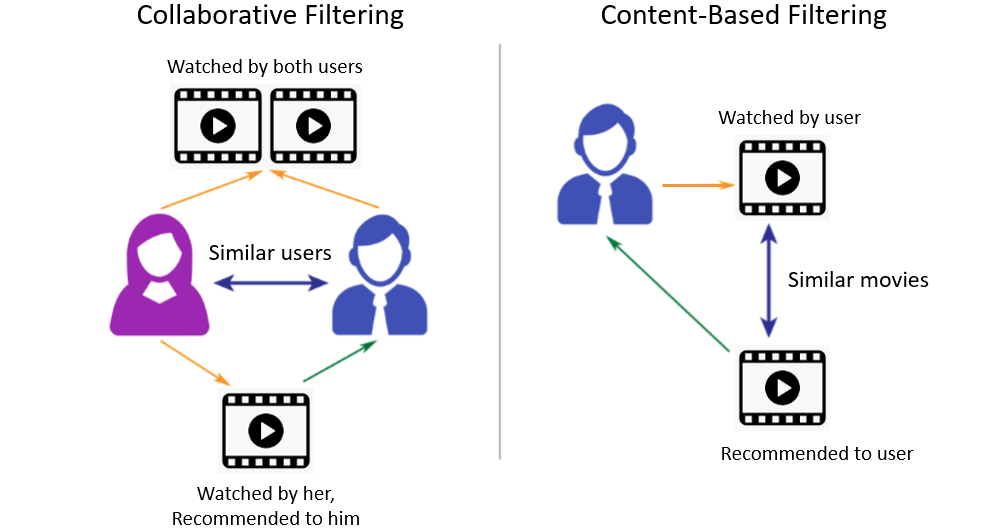

## Content Based Movie Recommendation System

Content-based recommendation, also known as content-based filtering, is a recommendation system that provides users with personalized recommendations based on their interests. This recommendation system suggests similar content based on the content the user has consumed in the past.

This type of recommendation system distinguishes content from one another using predefined features and brings together content with similar features. For example, the features for a movie may include genre, actors, director, plot, etc.

Based on a user's past consumption habits, the system suggests other content with similar features. For example, if a user has previously watched romantic comedies, the system will suggest romantic comedies with similar features.

The content-based recommendation system is particularly successful in areas where the content remains relatively fixed, such as music, movies, books, and news recommendations.

In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings("ignore")


In [3]:
df_movies = pd.read_csv("D:/data science - guvi/unified mentor/movie recommendation systems/dataset/movies_metadata.csv", low_memory=False)
df_credit=pd.read_csv(r"D:\data science - guvi\unified mentor\movie recommendation systems\dataset\credits.csv")
df_keyword=pd.read_csv(r"D:\data science - guvi\unified mentor\movie recommendation systems\dataset\keywords.csv")

In [4]:
df_movies.shape,df_credit.shape,df_keyword.shape

((45466, 24), (45476, 3), (46419, 2))

In [22]:
df_movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [23]:
df_credit.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [7]:
df_keyword.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [5]:
# Removing the records for which the id is not available
df_movies = df_movies[df_movies['id'].str.isnumeric()]


In [6]:
# converting the id to same data type to merge the dataframes

df_keyword['id']=df_keyword['id'].astype(int)
df_movies['id']=df_movies['id'].astype(int)
df_credit['id']=df_credit['id'].astype(int)

In [7]:
df = pd.merge(df_movies, df_keyword, on='id', how='left')
df.reset_index(inplace=True, drop=True)

In [8]:
df= pd.merge(df, df_credit, on='id', how='left')
df.reset_index(inplace=True, drop=True)

In [28]:
df.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,keywords,cast,crew
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...","[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'id': 10090, 'name': 'board game'}, {'id': 1...","[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."


In [9]:
# Selecting only movies with more than 50 votes
df1 = df[df['vote_count']>=50]

In [10]:
df1.shape

(9297, 27)

In [11]:
df1.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'keywords', 'cast', 'crew'],
      dtype='object')

#### Columns to keep for building the content based recommendation system 
- genres , id , original_title , overview , title , keywords, cast,crew

In [12]:
# Final dataset

df1 = df1[['id','title','genres','overview','keywords','cast','crew']]
df1.head()

,id,title,genres,overview,keywords,cast,crew
0,862,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","Led by Woody, Andy's toys live happily in his ...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...","[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,8844,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",When siblings Judy and Peter discover an encha...,"[{'id': 10090, 'name': 'board game'}, {'id': 1...","[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,15602,Grumpier Old Men,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",A family wedding reignites the ancient feud be...,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392...","[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
4,11862,Father of the Bride Part II,"[{'id': 35, 'name': 'Comedy'}]",Just when George Banks has recovered from his ...,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...","[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de..."
5,949,Heat,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...","Obsessive master thief, Neil McCauley leads a ...","[{'id': 642, 'name': 'robbery'}, {'id': 703, '...","[{'cast_id': 25, 'character': 'Lt. Vincent Han...","[{'credit_id': '52fe4292c3a36847f802916d', 'de..."


In [13]:
# checking for missing values

df1.isna().sum()

id           0
title        0
genres       0
overview    38
keywords     0
cast         0
crew         0
dtype: int64

In [14]:
# dropping the null values

df1.dropna(axis=0,inplace=True)

In [15]:
# checking for duplicates
df1.duplicated().sum()
df1.drop_duplicates(inplace=True)

#### Cleaning the dataset

- Present format :[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]
- Should convert to : ['Animation','Comedy','Family']

In [16]:
df1.genres[0]

"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]"

In [17]:
# cleaning the data - genres

df1['genres']=df1['genres'].apply(lambda x:[i['name'] for i in eval(x)])
df1['genres']=df1['genres'].apply(lambda x:[i.replace(" ","") for i in x])

In [18]:
df1.keywords[0]

"[{'id': 931, 'name': 'jealousy'}, {'id': 4290, 'name': 'toy'}, {'id': 5202, 'name': 'boy'}, {'id': 6054, 'name': 'friendship'}, {'id': 9713, 'name': 'friends'}, {'id': 9823, 'name': 'rivalry'}, {'id': 165503, 'name': 'boy next door'}, {'id': 170722, 'name': 'new toy'}, {'id': 187065, 'name': 'toy comes to life'}]"

In [19]:
# cleaning the column - keywords

df1['keywords']=df1['keywords'].apply(lambda x:[i['name'] for i in eval(x)])
df1['keywords']=df1['keywords'].apply(lambda x:[i.replace(" ","") for i in x])

In [20]:
df1.cast[0]

"[{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a36847f8024f95', 'gender': 2, 'id': 31, 'name': 'Tom Hanks', 'order': 0, 'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'}, {'cast_id': 15, 'character': 'Buzz Lightyear (voice)', 'credit_id': '52fe4284c3a36847f8024f99', 'gender': 2, 'id': 12898, 'name': 'Tim Allen', 'order': 1, 'profile_path': '/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg'}, {'cast_id': 16, 'character': 'Mr. Potato Head (voice)', 'credit_id': '52fe4284c3a36847f8024f9d', 'gender': 2, 'id': 7167, 'name': 'Don Rickles', 'order': 2, 'profile_path': '/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg'}, {'cast_id': 17, 'character': 'Slinky Dog (voice)', 'credit_id': '52fe4284c3a36847f8024fa1', 'gender': 2, 'id': 12899, 'name': 'Jim Varney', 'order': 3, 'profile_path': '/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg'}, {'cast_id': 18, 'character': 'Rex (voice)', 'credit_id': '52fe4284c3a36847f8024fa5', 'gender': 2, 'id': 12900, 'name': 'Wallace Shawn', 'order': 4, 'profile_path': '/oGE6JqPP2xH4t

In [21]:
# cleaning the column - cast (here we are adding only first 3 cast members)

df1['cast']=df1['cast'].apply(lambda x:[i['name'] for i in eval(x)[:3]])
df1['cast']=df1['cast'].apply(lambda x:[i.replace(" ","") for i in x])

In [22]:
df1.crew[1]

"[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'department': 'Production', 'gender': 2, 'id': 511, 'job': 'Executive Producer', 'name': 'Larry J. Franco', 'profile_path': None}, {'credit_id': '52fe44bfc3a36847f80a7c89', 'department': 'Writing', 'gender': 2, 'id': 876, 'job': 'Screenplay', 'name': 'Jonathan Hensleigh', 'profile_path': '/l1c4UFD3g0HVWj5f0CxXAvMAGiT.jpg'}, {'credit_id': '52fe44bfc3a36847f80a7cdd', 'department': 'Sound', 'gender': 2, 'id': 1729, 'job': 'Original Music Composer', 'name': 'James Horner', 'profile_path': '/oLOtXxXsYk8X4qq0ud4xVypXudi.jpg'}, {'credit_id': '52fe44bfc3a36847f80a7c7d', 'department': 'Directing', 'gender': 2, 'id': 4945, 'job': 'Director', 'name': 'Joe Johnston', 'profile_path': '/fok4jaO62v5IP6hkpaaAcXuw2H.jpg'}, {'credit_id': '52fe44bfc3a36847f80a7cd7', 'department': 'Editing', 'gender': 2, 'id': 4951, 'job': 'Editor', 'name': 'Robert Dalva', 'profile_path': None}, {'credit_id': '573523bec3a368025100062c', 'department': 'Production', 'gender': 0, '

In [23]:
# cleaning the column - crew (here we are only fetching the name of the director)

df1['crew']=df1['crew'].apply(lambda x:[i['name'] for i in eval(x) if i['job']=='Director'])
df1['crew']=df1['crew'].apply(lambda x:[i.replace(" ","") for i in x])

In [24]:
df1["overview"][0]

"Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences."

In [25]:
# cleaning the column - overview (here we are only fetching the name of the director)
df1["overview"] = df1["overview"].str.replace(r"[^\w\s]"," ",regex=True).str.replace(r"[\d]"," ",regex=True)
df1['overview']=df1['overview'].apply(lambda x: x.split())

In [26]:
df1.head()

,id,title,genres,overview,keywords,cast,crew
0,862,Toy Story,"[Animation, Comedy, Family]","[Led, by, Woody, Andy, s, toys, live, happily,...","[jealousy, toy, boy, friendship, friends, riva...","[TomHanks, TimAllen, DonRickles]",[JohnLasseter]
1,8844,Jumanji,"[Adventure, Fantasy, Family]","[When, siblings, Judy, and, Peter, discover, a...","[boardgame, disappearance, basedonchildren'sbo...","[RobinWilliams, JonathanHyde, KirstenDunst]",[JoeJohnston]
2,15602,Grumpier Old Men,"[Romance, Comedy]","[A, family, wedding, reignites, the, ancient, ...","[fishing, bestfriend, duringcreditsstinger, ol...","[WalterMatthau, JackLemmon, Ann-Margret]",[HowardDeutch]
4,11862,Father of the Bride Part II,[Comedy],"[Just, when, George, Banks, has, recovered, fr...","[baby, midlifecrisis, confidence, aging, daugh...","[SteveMartin, DianeKeaton, MartinShort]",[CharlesShyer]
5,949,Heat,"[Action, Crime, Drama, Thriller]","[Obsessive, master, thief, Neil, McCauley, lea...","[robbery, detective, bank, obsession, chase, s...","[AlPacino, RobertDeNiro, ValKilmer]",[MichaelMann]


In [27]:
# Creating a new column - tags

df1['tags']=df1['overview']+df1['genres']+df1['keywords']+df1['cast']+df1['crew']

In [28]:
df1.head(2)

,id,title,genres,overview,keywords,cast,crew,tags
0,862,Toy Story,"[Animation, Comedy, Family]","[Led, by, Woody, Andy, s, toys, live, happily,...","[jealousy, toy, boy, friendship, friends, riva...","[TomHanks, TimAllen, DonRickles]",[JohnLasseter],"[Led, by, Woody, Andy, s, toys, live, happily,..."
1,8844,Jumanji,"[Adventure, Fantasy, Family]","[When, siblings, Judy, and, Peter, discover, a...","[boardgame, disappearance, basedonchildren'sbo...","[RobinWilliams, JonathanHyde, KirstenDunst]",[JoeJohnston],"[When, siblings, Judy, and, Peter, discover, a..."


In [29]:
# using lemmatization to get the root word 
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer_object = WordNetLemmatizer()
df1['tags']=df1['tags'].apply(lambda x:[lemmatizer_object.lemmatize(word) for word in x])

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vidhya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [30]:
df_new=df1[['id','title','tags']]
df_new['tags']=df_new['tags'].apply(lambda x: " ".join(x))
df_new['tags']=df_new['tags'].apply(lambda x: x.lower())

In [31]:
df_new.head()

,id,title,tags
0,862,Toy Story,led by woody andy s toy live happily in his ro...
1,8844,Jumanji,when sibling judy and peter discover an enchan...
2,15602,Grumpier Old Men,a family wedding reignites the ancient feud be...
4,11862,Father of the Bride Part II,just when george banks ha recovered from his d...
5,949,Heat,obsessive master thief neil mccauley lead a to...


In [58]:
df_new.shape

(9108, 3)

In [32]:
df_new.duplicated().sum()

2

In [41]:
df_new.drop_duplicates(inplace=True)
df_new.reset_index(inplace=True, drop=True)

In [42]:
df_new.tags[0]

'led by woody andy s toy live happily in his room until andy s birthday brings buzz lightyear onto the scene afraid of losing his place in andy s heart woody plot against buzz but when circumstance separate buzz and woody from their owner the duo eventually learns to put aside their difference animation comedy family jealousy toy boy friendship friend rivalry boynextdoor newtoy toycomestolife tomhanks timallen donrickles johnlasseter'

In [43]:
df_new.head()

,id,title,tags
0,862,Toy Story,led by woody andy s toy live happily in his ro...
1,8844,Jumanji,when sibling judy and peter discover an enchan...
2,15602,Grumpier Old Men,a family wedding reignites the ancient feud be...
3,11862,Father of the Bride Part II,just when george banks ha recovered from his d...
4,949,Heat,obsessive master thief neil mccauley lead a to...


## Text Vectorization

**Creating the TF-IDF Matrix**

- *Text Vectorization*

Text vectorization converts text into numerical vectors for machine learning in NLP. A common method is the **Bag-of-Words (BoW)** model, which preprocesses text by removing stop words and punctuation, tokenizes remaining words, and represents each document as a vector of term frequencies. Another approach, **Term Frequency-Inverse Document Frequency**(TF-IDF), weighs terms based on their frequency in a document and rarity across the corpus. These techniques enable machine learning models to analyze large volumes of text for applications like sentiment analysis, chatbots, and information retrieval.

- *TF*

TF stands for Term Frequency and it measures the frequency of a term (i.e., a word or a phrase) in a document. The term frequency of a term t in a document d is calculated as the number of times t appears in d, divided by the total number of terms in d. This calculation normalizes the term frequency by the document length to avoid bias towards longer documents.

TF is commonly used in natural language processing and information retrieval to represent the importance of a term within a document. It can be used in combination with IDF (Inverse Document Frequency) to calculate the TF-IDF score, which provides a measure of the importance of a term across a collection of documents.

- *IDF*

IDF stands for Inverse Document Frequency and it is used to determine how important a word is in a document collection. IDF measures the rarity of a term across the entire document collection. Words that occur frequently across the collection, such as "the" or "and," will have a low IDF value, while words that are rare, such as domain-specific jargon, will have a higher IDF value.

The IDF score of a term is calculated as the logarithm of the total number of documents in the collection divided by the number of documents that contain the term. The formula for IDF is:

IDF = log(N / df)

where N is the total number of documents in the collection, and df is the number of documents that contain the term.

The IDF value is used in the TF-IDF (Term Frequency-Inverse Document Frequency) formula to calculate the importance of a term in a document. The higher the IDF score, the more important the term is in distinguishing between documents.



In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [47]:
tdidf=TfidfVectorizer(stop_words="english",max_features=8000)
vectors = tdidf.fit_transform(df_new['tags'].values)
vectors = vectors.astype(np.float32).toarray()

## Cosine Similarity

Cosine similarity is a measure of similarity between two non-zero vectors in a high-dimensional space. It is commonly used in natural language processing and information retrieval to compare the similarity of two documents or pieces of text.

To calculate the cosine similarity between two vectors, we first compute the dot product of the two vectors, which is the sum of the products of their corresponding elements. Then, we divide the dot product by the product of their magnitudes to obtain the cosine of the angle between the two vectors. The resulting value is a measure of the similarity between the two vectors, with a value of 1 indicating that the vectors are identical, and a value of 0 indicating that the vectors are completely dissimilar.

![image.png](attachment:image.png)

In the context of text similarity, cosine similarity is often used to compare the similarity of two documents or pieces of text that have been vectorized using techniques such as the Bag-of-Words (BoW) model or the Term Frequency-Inverse Document Frequency (TF-IDF) model. By comparing the cosine similarity of multiple documents, we can identify those that are most similar to each other and group them accordingly, which is useful for tasks such as document clustering or information retrieval.

In [51]:
cosine_sim = cosine_similarity(vectors)

In [52]:
cosine_sim[0]

array([1.0000001 , 0.01834532, 0.0055628 , ..., 0.        , 0.07756018,
       0.0042113 ], dtype=float32)

## Making Recommendation

We are now in a good position to define our recommendation function. These are the following steps we'll follow :-

- Get the index of the movie given its title.
- Get the list of cosine similarity scores for that particular movie with all movies. Convert it into a list of tuples where the first element is its position and the second is the similarity score.
- Sort the aforementioned list of tuples based on the similarity scores; that is, the second element.
- Get the top 10 elements of this list. Ignore the first element as it refers to self (the movie most similar to a particular movie is the movie itself).
- Return the titles corresponding to the indices of the top elements.

In [71]:
def recommendation(movie):
    movie_index=df_new[df_new['title'] == movie].index[0]
    similarity_scores = pd.DataFrame(cosine_sim[movie_index],columns=["similarity"])
    movie_indices = similarity_scores.sort_values("similarity", ascending=False)[1:11].index
    df = df_new['title'].iloc[movie_indices]
    return df


In [77]:
recommendation('Batman Begins')

4770                            The Dark Knight
6022                      The Dark Knight Rises
5533                 Batman: Under the Red Hood
320                                      Batman
6395    Batman: The Dark Knight Returns, Part 1
1636               Batman: Mask of the Phantasm
712                              Batman Returns
7993         Batman v Superman: Dawn of Justice
80                               Batman Forever
7780                           Batman vs. Robin
Name: title, dtype: object

## Creating pickle file

In [79]:
import pickle
with open('movies.pkl','wb') as f:
    pickle.dump(df_new,f)

In [85]:
import pickle
with open('consine_similarity.pkl','wb') as f:
    pickle.dump(cosine_sim,f)